# IPL 2025 DATA ANALYSIS

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
import cufflinks as cf
cf.go_offline()

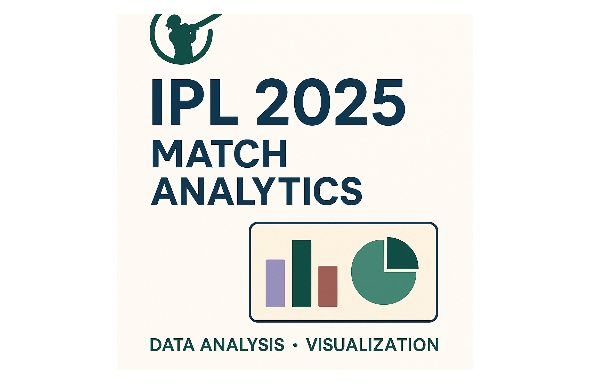

In [11]:
Thumbnail_img = mpimg.imread("Thumbnail.png")

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

imagebox = OffsetImage(Thumbnail_img, zoom=0.25)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False)
ax.add_artist(ab)
plt.tight_layout()
plt.show()

In [58]:
df=pd.read_csv("matches.csv")
df.head(10)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,match_result,match_winner,wb_runs,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,completed,RCB,NaN,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,completed,SRH,44,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155.0,9.0,...,completed,CSK,NaN,4,5.0,Noor Ahmad,Rachin Ravindra,65.0,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209.0,8.0,...,completed,DC,NaN,1,3.0,Ashutosh Sharma,Nicholas Pooran,75.0,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243.0,5.0,...,completed,PBKS,11,NaN,0.0,Shreyas Iyer,Shreyas Iyer,97.0,Sai Kishore,3--30
5,6,"March 26,2025","Barsapara Stadium, Guwahati",RR,KKR,League,KKR,Bowl,151.0,9.0,...,completed,KKR,NaN,8,15.0,Quinton de Kock,Quinton de Kock,97.0,Varun Chakravarthy,2--17
6,7,"March 27,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,LSG,League,LSG,Bowl,190.0,9.0,...,completed,LSG,NaN,5,23.0,Shardul Thakur,Nicholas Pooran,70.0,Shardul Thakur,4--34
7,8,"March 28,2025","MA Chidambaram Stadium, Chennai",CSK,RCB,League,CSK,Bowl,196.0,7.0,...,completed,RCB,50,NaN,0.0,Rajat Patidar,Rajat Patidar,51.0,Josh Hazlewood,3--21
8,9,"March 29,2025","Narendra Modi Stadium, Ahmedabad",GT,MI,League,MI,Bowl,196.0,8.0,...,completed,GT,36,NaN,0.0,Prasidh Krishna,Sai Sudarshan,63.0,Prasidh Krishna,2--18
9,10,"March 30,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,SRH,League,SRH,Bat,163.0,10.0,...,completed,DC,NaN,7,24.0,Mitchell Starc,Aniket Verma,74.0,Mitchell Starc,5--35


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   match_id             74 non-null     int64  
 1   date                 74 non-null     object 
 2   venue                74 non-null     object 
 3   team1                74 non-null     object 
 4   team2                74 non-null     object 
 5   stage                74 non-null     object 
 6   toss_winner          73 non-null     object 
 7   toss_decision        74 non-null     object 
 8   first_ings_score     73 non-null     float64
 9   first_ings_wkts      73 non-null     float64
 10  second_ings_score    72 non-null     float64
 11  second_ings_wkts     72 non-null     float64
 12  match_result         74 non-null     object 
 13  match_winner         71 non-null     object 
 14  wb_runs              34 non-null     object 
 15  wb_wickets           38 non-null     objec

In [60]:
df.describe()

,match_id,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,balls_left,highscore
count,74.000000,73.000000,73.000000,72.000000,72.000000,72.000000,71.000000
mean,37.500000,189.753425,6.452055,174.013889,5.513889,10.819444,74.549296
std,21.505813,37.489547,2.108456,38.805217,2.882649,17.674942,20.088226
min,1.000000,95.000000,2.000000,7.000000,0.000000,0.000000,37.000000
25%,19.250000,166.000000,5.000000,158.000000,3.000000,0.000000,61.000000
50%,37.500000,196.000000,6.000000,177.000000,5.000000,5.500000,73.000000
75%,55.750000,213.000000,8.000000,201.250000,8.000000,13.500000,88.500000
max,74.000000,286.000000,10.000000,247.000000,10.000000,114.000000,141.000000


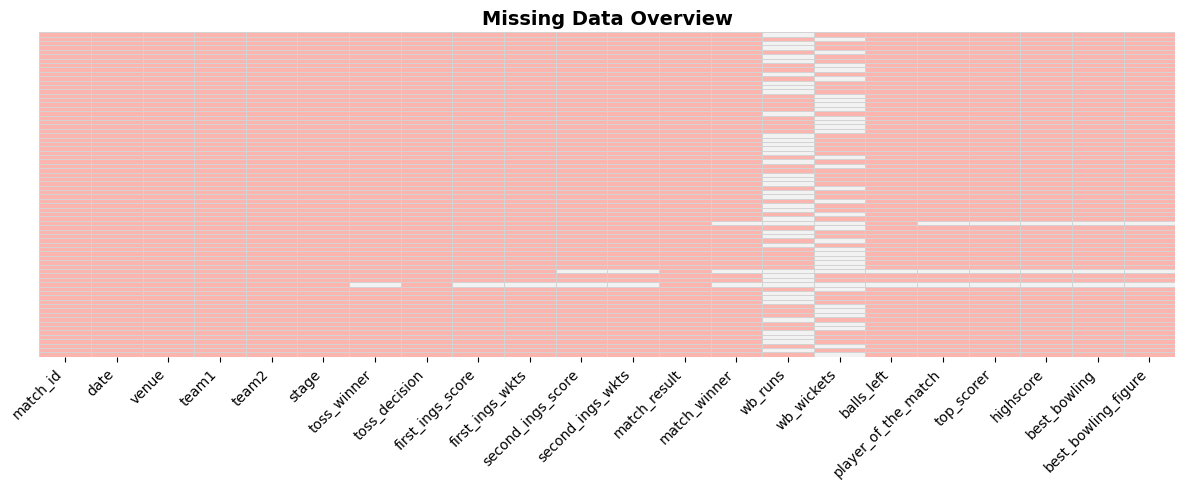

In [61]:
plt.figure(figsize=(12,5))
sns.heatmap(df.isnull(), 
            cmap="Pastel1",
            cbar=False, 
            linewidths=0.5, 
            linecolor='lightgrey')

plt.title("Missing Data Overview", fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.tight_layout()
plt.show()

In [62]:
print(f"rows:{df.shape[0]} and columns:{df.shape[1]}")

rows:74 and columns:22


In [63]:
df.isnull().sum()

match_id                0
date                    0
venue                   0
team1                   0
team2                   0
stage                   0
toss_winner             1
toss_decision           0
first_ings_score        1
first_ings_wkts         1
second_ings_score       2
second_ings_wkts        2
match_result            0
match_winner            3
wb_runs                40
wb_wickets             36
balls_left              2
player_of_the_match     3
top_scorer              3
highscore               3
best_bowling            3
best_bowling_figure     3
dtype: int64

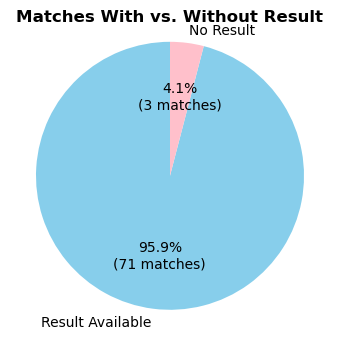

In [64]:
#Count of matches with results and no results
result_counts = df['match_winner'].isnull().value_counts()
labels = ['Result Available', 'No Result']
colors = ['skyblue', 'pink']

# Customizing function to show count+ percentage
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count} matches)'
    return my_autopct

plt.figure(figsize=(3.5,3.5))
plt.pie(result_counts, labels=labels, autopct=make_autopct(result_counts), startangle=90, colors=colors,textprops={'fontsize': 10})

plt.title("Matches With vs. Without Result", fontsize=12, weight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [65]:
most_match_winner=df['match_winner'].value_counts()
print(most_match_winner)

match_winner
PBKS    11
RCB     10
GT       9
DC       8
MI       8
SRH      6
LSG      6
KKR      5
CSK      4
RR       4
Name: count, dtype: int64


Text(0.5, 1.0, 'Most Match Win By Team')

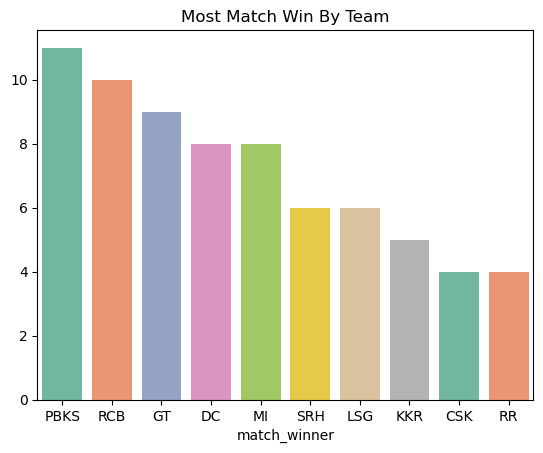

In [66]:
sns.barplot(x=most_match_winner.index,y=most_match_winner.values,palette='Set2')
plt.title("Most Match Win By Team")

In [67]:
#Toss Decision Trends
df["toss_decision"].value_counts().iplot(
    kind='bar',
    xTitle='Toss Decision',
    yTitle='Count',
    title='Toss Decision Trends',
    color='skyblue'
)

Text(0.5, 1.0, 'Distribution of Match Results')

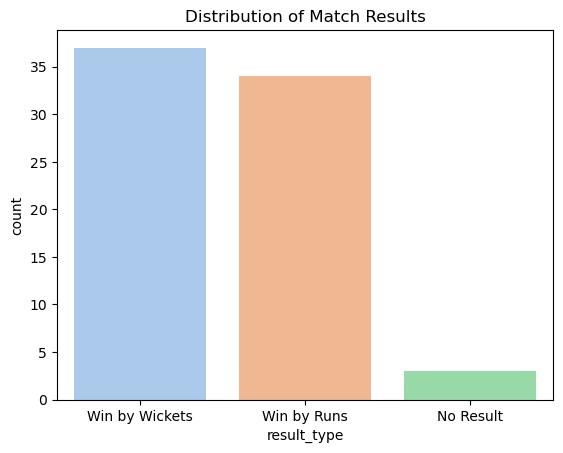

In [68]:
df['result_type'] = df.apply(lambda x: 'Win by Runs' if pd.notna(x['wb_runs']) 
                             else 'Win by Wickets' if pd.notna(x['wb_wickets']) 
                             else 'No Result', axis=1)

sns.countplot(x='result_type', data=df, palette='pastel')
plt.title("Distribution of Match Results")

In [69]:
#Toss Winner vs Match Winner
count=df[df["toss_winner"]==df["match_winner"]]["match_id"].count()
percentage=(count*100)/df.shape[0]
# print(f"Percentage to win by winning the toss: {percentage:.2f}%")

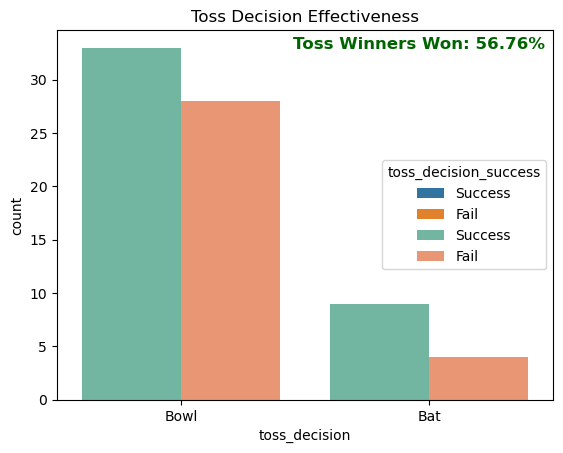

In [70]:
df['toss_decision_success'] = df.apply(lambda x: 'Success' if x['toss_winner'] == x['match_winner'] else 'Fail', axis=1)
sns.countplot(x='toss_decision', hue='toss_decision_success', data=df)
plt.title("Toss Decision Effectiveness")
text_str = f"Toss Winners Won: {percentage:.2f}%"
ax = sns.countplot(x='toss_decision', hue='toss_decision_success', data=df, palette='Set2')
plt.text(x=0.45, y=ax.get_ylim()[1]*0.95, s=text_str, fontsize=12, color='darkgreen', weight='bold')
plt.show()

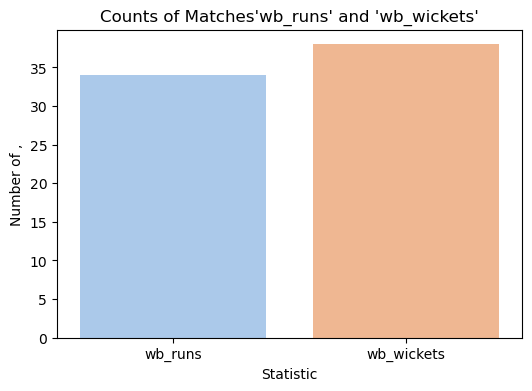

In [71]:
#Matches Won by runs vs Won by Wickets
counts_df = pd.DataFrame({
    'Stat': ['wb_runs', 'wb_wickets'],
    'Count': [df['wb_runs'].count(), df['wb_wickets'].count()]
})

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x='Stat', y='Count', data=counts_df, palette="pastel")
plt.title("Counts of Matches'wb_runs' and 'wb_wickets'")
plt.ylabel("Number of ,")
plt.xlabel("Statistic")
plt.show()

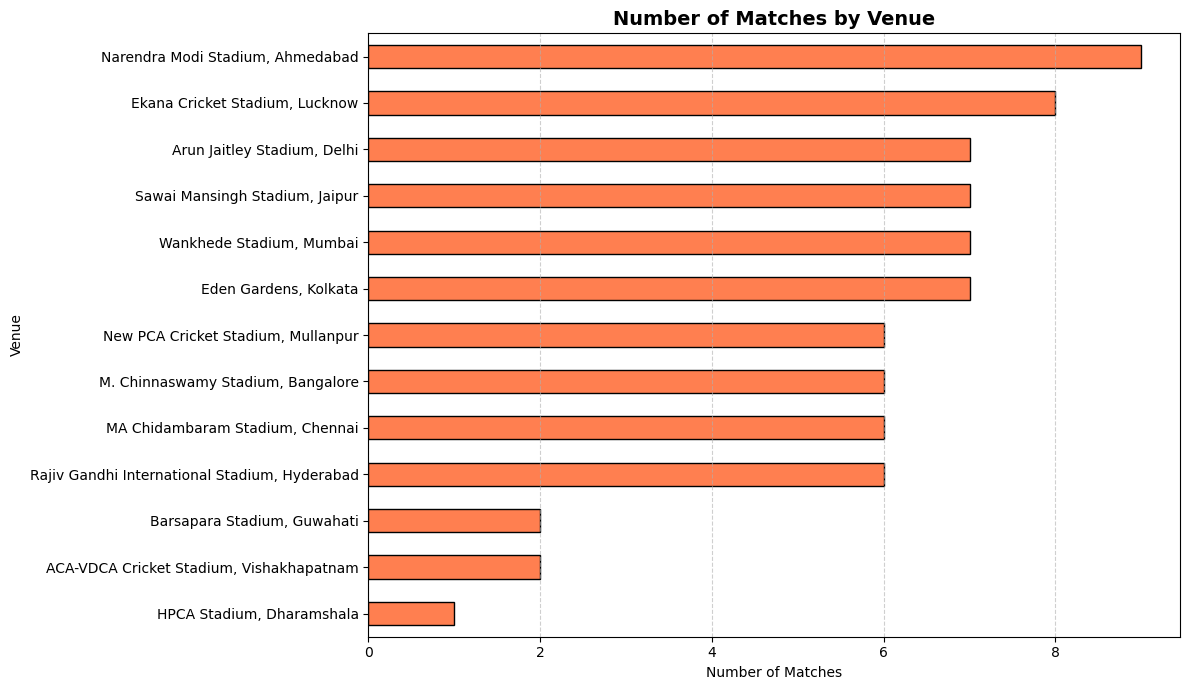

In [85]:
plt.figure(figsize=(12, 7))
venue_counts.sort_values().plot(kind='barh', color='coral', edgecolor='black')

plt.title("Number of Matches by Venue", fontsize=14, weight='bold')
plt.xlabel("Number of Matches")
plt.ylabel("Venue")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

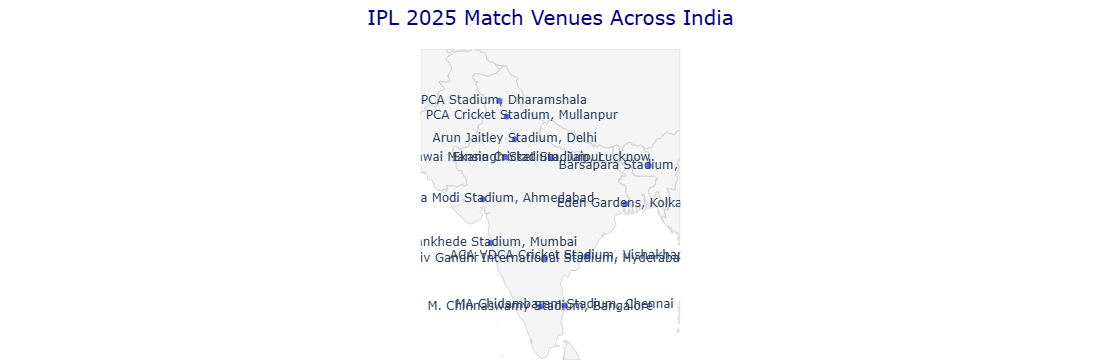

In [138]:
#IPL_2025 MATCH VENUE ACROSS INDIA
import plotly.express as px
venue_coords = {
    "Narendra Modi Stadium, Ahmedabad": (23.0225, 72.5714),
    "Ekana Cricket Stadium, Lucknow": (26.8467, 80.9462),
    "Eden Gardens, Kolkata": (22.5726, 88.3639),
    "Wankhede Stadium, Mumbai": (18.9388, 72.8258),
    "Sawai Mansingh Stadium, Jaipur": (26.9124, 75.7873),
    "Arun Jaitley Stadium, Delhi": (28.6139, 77.2090),
    "Rajiv Gandhi International Stadium, Hyderabad": (17.3850, 78.4867),
    "MA Chidambaram Stadium, Chennai": (13.0827, 80.2707),
    "M. Chinnaswamy Stadium, Bangalore": (12.9716, 77.5946),
    "New PCA Cricket Stadium, Mullanpur": (30.7426, 76.7890),
    "ACA-VDCA Cricket Stadium, Vishakhapatnam": (17.6868, 83.2185),
    "Barsapara Stadium, Guwahati": (26.1445, 91.7362),
    "HPCA Stadium, Dharamshala": (32.2190, 76.3234)
}
df['latitude'] = df['venue'].map(lambda x: venue_coords.get(x, (None, None))[0])
df['longitude'] = df['venue'].map(lambda x: venue_coords.get(x, (None, None))[1])

unique_venues = df.drop_duplicates(subset="venue").dropna(subset=["latitude", "longitude"])

fig = px.scatter_geo(
    unique_venues,
    lat='latitude',
    lon='longitude',
    text='venue',
    scope='asia',
    title="IPL 2025 Match Venues Across India",
    template="plotly",
    projection="natural earth"
)

fig.update_geos(
    visible=False,
    resolution=50,
    showcountries=True,
    showsubunits=True,
    lataxis_range=[8, 37],
    lonaxis_range=[68, 92],  
    countrycolor="LightGrey",
    showland=True,
    landcolor="whitesmoke"
)

fig.update_layout(
    title_font_size=20,
    title_font_color='darkblue',
    title_x=0.5,
    geo=dict(bgcolor='rgba(0,0,0,0)'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()

Text(0.5, 1.0, 'Score Distribution: 1st vs 2nd Innings')

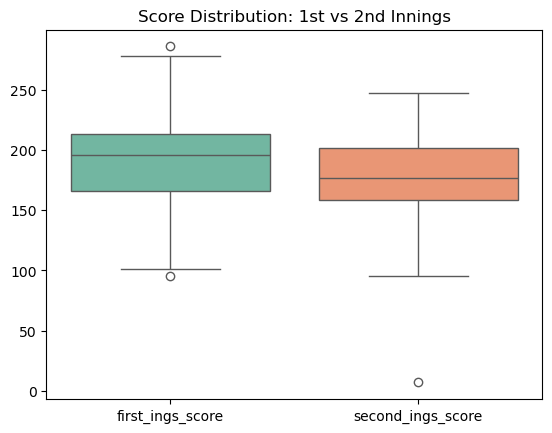

In [72]:
#1st Vs 2nd INNINGS SCORE
sns.boxplot(data=df[['first_ings_score', 'second_ings_score']], palette="Set2")
plt.title("Score Distribution: 1st vs 2nd Innings")

Text(0.5, 1.0, 'Match Score Comparison')

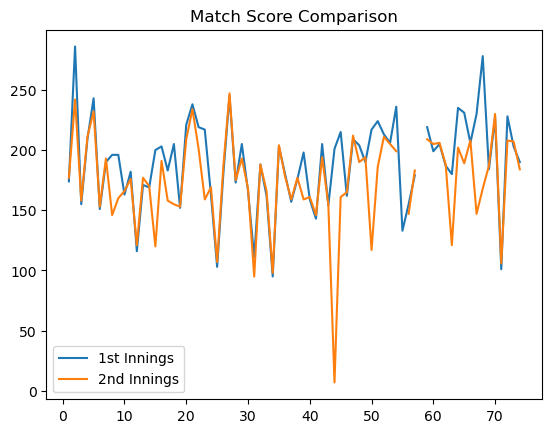

In [73]:
plt.plot(df['match_id'], df['first_ings_score'], label='1st Innings')
plt.plot(df['match_id'], df['second_ings_score'], label='2nd Innings')
plt.legend()
plt.title("Match Score Comparison")

Text(0.5, 1.0, 'Fastest Wins (Balls Left)')

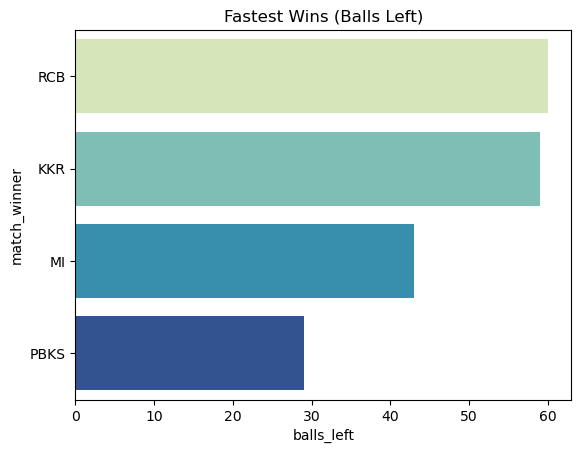

In [74]:
#Fastest Wins By Balls left
fast_wins = df[df['balls_left'].notnull()].sort_values(by='balls_left', ascending=False).head(5)
sns.barplot(data=fast_wins, x='balls_left', y='match_winner', palette='YlGnBu')
plt.title("Fastest Wins (Balls Left)")

## Key Player Performences

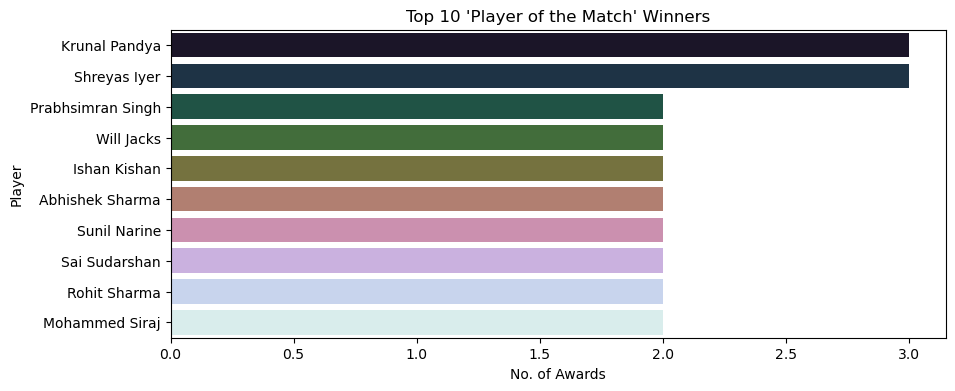

In [76]:
plt.figure(figsize=(10,4))
top_players = df["player_of_the_match"].value_counts().nlargest(10)
sns.barplot(x=top_players.values, y=top_players.index, palette="cubehelix")
plt.title("Top 10 'Player of the Match' Winners")
plt.xlabel("No. of Awards")
plt.ylabel("Player")
plt.show()

In [77]:
#Top Run Scorers by Aggregate Highest Scores in a match
high=df.groupby("top_scorer")["highscore"].sum().sort_values(ascending=False).head(3)
high

top_scorer
Nicholas Pooran    293.0
Virat Kohli        269.0
Sai Sudarshan      253.0
Name: highscore, dtype: float64

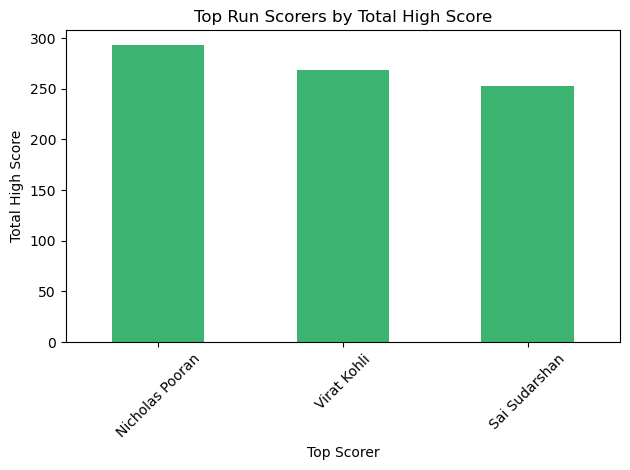

In [78]:
high.plot(kind='bar', color='mediumseagreen')
plt.title("Top Run Scorers by Total High Score")
plt.xlabel("Top Scorer")
plt.ylabel("Total High Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Top 10 Bowling Figures

In [80]:
df['highest_wicket'] = df['best_bowling_figure'].apply(lambda x: x.split('--')[0] if isinstance(x, str) and '--' in x else None)
df['highest_wicket'] = pd.to_numeric(df['highest_wicket'], errors='coerce').astype('Int64')
df.head(2)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,result_type,toss_decision_success,highest_wicket
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,Win by Wickets,Success,3
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286.0,6.0,...,NaN,0.0,Ishan Kishan,Ishan Kishan,106.0,Tushar Deshpande,3--44,Win by Runs,Fail,3


In [81]:
top_bowlers=df.groupby('best_bowling')['highest_wicket'].sum().sort_values(ascending=False).head()
top_bowlers

best_bowling
Prasidh Krishna    13
Arshdeep Singh     11
Noor Ahmad         11
Josh Hazlewood     10
Krunal Pandya      10
Name: highest_wicket, dtype: Int64

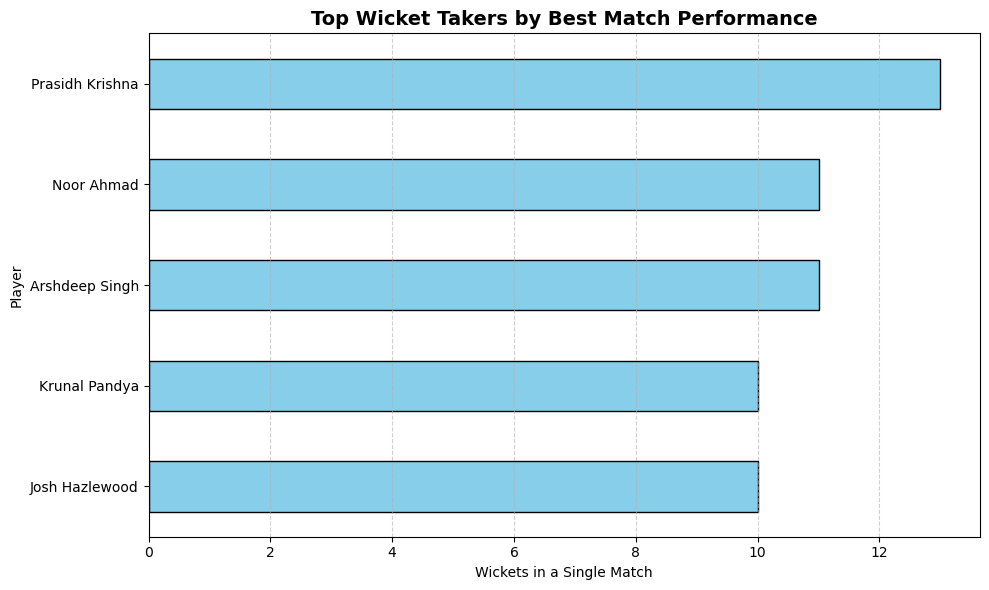

In [82]:
#Top Wicket Takers by Best Match Performance
plt.figure(figsize=(10, 6))
top_bowlers.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Top Wicket Takers by Best Match Performance", fontsize=14, weight='bold')
plt.xlabel("Wickets in a Single Match")
plt.ylabel("Player")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Venue Analysis

In [84]:
venue_counts=df["venue"].value_counts()
venue_counts.head()

venue
Narendra Modi Stadium, Ahmedabad    9
Ekana Cricket Stadium, Lucknow      8
Eden Gardens, Kolkata               7
Wankhede Stadium, Mumbai            7
Sawai Mansingh Stadium, Jaipur      7
Name: count, dtype: int64

In [86]:
df.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,wb_wickets,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,result_type,toss_decision_success,highest_wicket
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174.0,8.0,...,7,22.0,Krunal Pandya,Virat Kohli,59.0,Krunal Pandya,3--29,Win by Wickets,Success,3


In [87]:
#Top 3 Largest Wins by Runs
df['wb_runs'] = pd.to_numeric(df['wb_runs'], errors='coerce')
won_by_runs_df = df[df['wb_runs'] > 0]
won_by_runs_df = won_by_runs_df.sort_values(by='wb_runs', ascending=False)[["match_winner","wb_runs"]]
won_by_runs_df.head(3)

,match_winner,wb_runs
67,SRH,110.0
49,MI,100.0
66,CSK,83.0


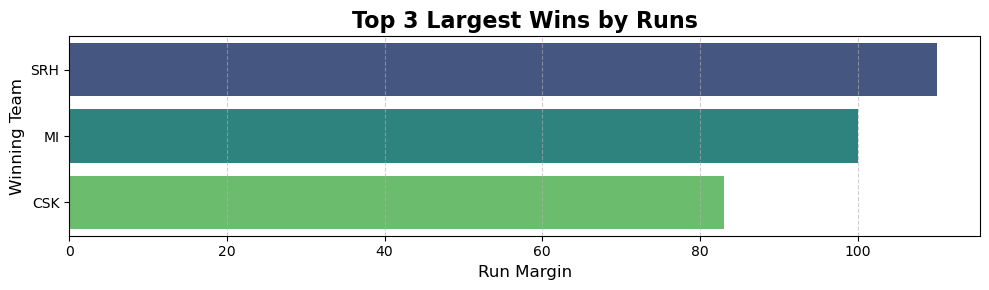

In [88]:
plt.figure(figsize=(10, 3))
sns.barplot(data=won_by_runs_df.head(3), x="wb_runs", y="match_winner", palette="viridis")
plt.title("Top 3 Largest Wins by Runs", fontsize=16, weight='bold')
plt.xlabel("Run Margin", fontsize=12)
plt.ylabel("Winning Team", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [89]:
#Highest Run Scorer of Season 2025
df[df["highscore"]==df["highscore"].max()][["top_scorer","highscore"]]

,top_scorer,highscore
26,Abhishek Sharma,141.0


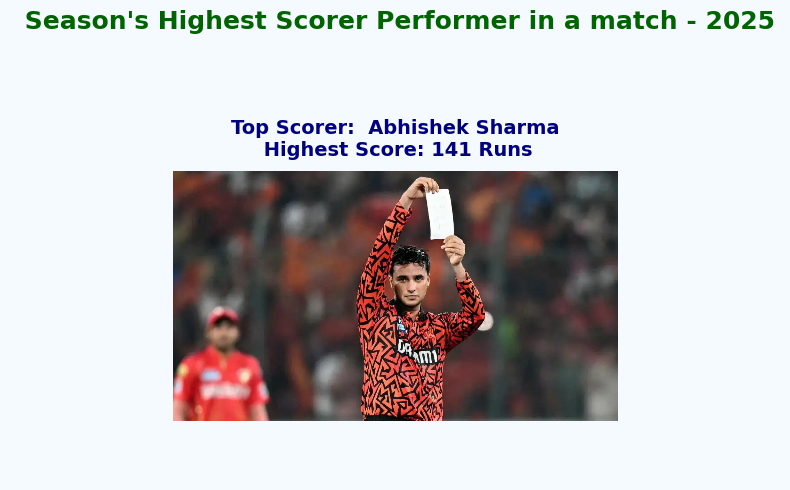

In [90]:
#Highest Run Scorer of Season 2025
player_img = mpimg.imread("abhishek_sharma.jpg")  
top_player = "Abhishek Sharma"
top_score = 141

# Creating figure
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#f4faff')
ax.axis('off')
plt.title(" Season's Highest Scorer Performer in a match - 2025",fontsize=18,color='darkgreen',weight='bold',pad=10)
ax.text(0.5, 0.78,f"Top Scorer:  {top_player}\n Highest Score: {top_score} Runs",ha='center', va='center', fontsize=14, weight='bold', color='navy')

imagebox = OffsetImage(player_img, zoom=0.25)
ab = AnnotationBbox(imagebox, (0.5, 0.42), frameon=False)
ax.add_artist(ab)

plt.tight_layout()
plt.show()

In [117]:
#Best Bowling Figure 
df[df["highest_wicket"]==df["highest_wicket"].max()][["best_bowling","best_bowling_figure"]]

,best_bowling,best_bowling_figure
9,Mitchell Starc,5--35
15,Hardik Pandya,5--36


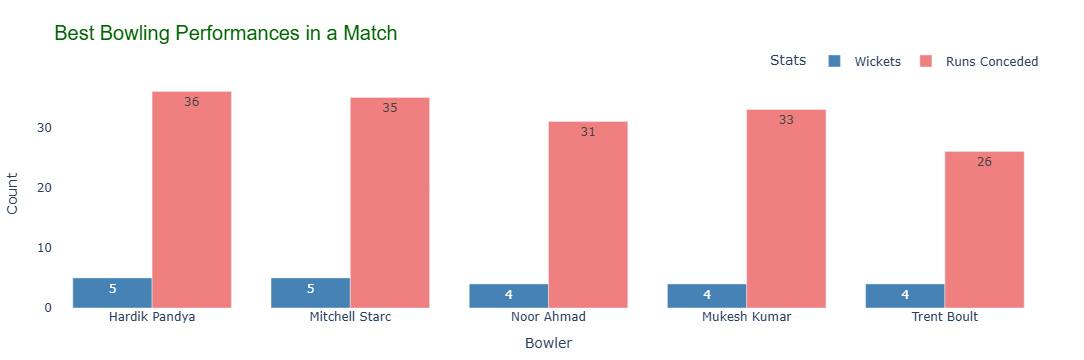

In [119]:
#Best Bowling Figure 
valid_figures = df['best_bowling_figure'].dropna()
valid_figures = valid_figures[valid_figures.str.contains("--")]

#Extracting wickets and runs as integers
split_figures = valid_figures.str.split("--", expand=True)
split_figures.columns = ['wickets', 'runs']
split_figures = split_figures.astype(int)

df.loc[split_figures.index, 'wickets'] = split_figures['wickets']
df.loc[split_figures.index, 'runs'] = split_figures['runs']

top_figures = df.loc[split_figures.index].copy()
top_figures = top_figures[['best_bowling', 'wickets', 'runs']]
top_figures = top_figures.sort_values(by="wickets", ascending=False).head(5)

#Building Plotly Bar Chart
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(
        name='Wickets',
        x=top_figures['best_bowling'],
        y=top_figures['wickets'],
        marker_color='steelblue',
        text=top_figures['wickets'],
        textposition='auto'
    ),
    go.Bar(
        name='Runs Conceded',
        x=top_figures['best_bowling'],
        y=top_figures['runs'],
        marker_color='lightcoral',
        text=top_figures['runs'],
        textposition='auto'
    )
])

fig.update_layout(
    title="Best Bowling Performances in a Match",
    xaxis_title="Bowler",
    yaxis_title="Count",
    barmode='group',
    plot_bgcolor='white',
    title_font=dict(size=20, color='darkgreen', family='Arial'),
    xaxis=dict(tickangle=0),
    legend=dict(title="Stats", orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
    margin=dict(t=80, l=40, r=40, b=40)
)
fig.show()

## Road To Victory

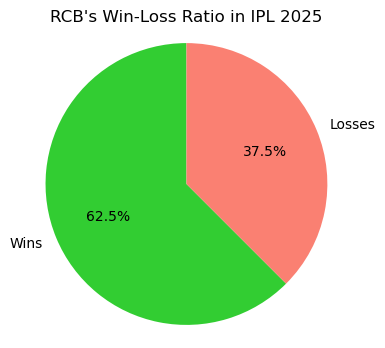

In [125]:
#Match-Wise Performance Plot (Wins vs Losses)
team_matches = df[(df['team1'] == final_winner) | (df['team2'] == final_winner)]
wins = team_matches[team_matches['match_winner'] == final_winner].shape[0]
losses = team_matches.shape[0] - wins

plt.figure(figsize=(4, 4))
plt.pie([wins, losses], labels=['Wins', 'Losses'], colors=['limegreen', 'salmon'], autopct='%1.1f%%', startangle=90)
plt.title(f"{final_winner}'s Win-Loss Ratio in IPL 2025")
plt.axis('equal')
plt.show()

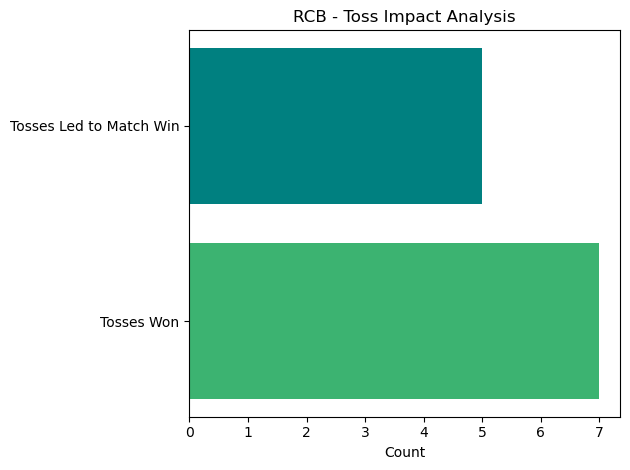

In [133]:
#Toss Win vs Match Win
toss_wins = df[df['toss_winner'] == final_winner]
toss_win_match_win = toss_wins[toss_wins['match_winner'] == final_winner].shape[0]

plt.barh(['Tosses Won', 'Tosses Led to Match Win'], [toss_wins.shape[0], toss_win_match_win], color=['mediumseagreen', 'Teal'])
plt.title(f"{final_winner} - Toss Impact Analysis")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

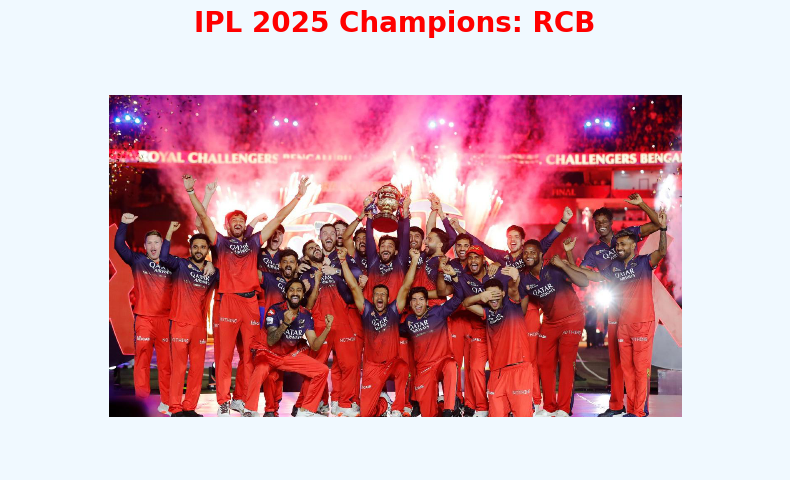

In [135]:
#IPL Season 2025 Winning Team Name and Image
final_winner = df[df['stage'] == 'Final']['match_winner'].values[0]
plt.savefig("ipl_2025_winner.png", dpi=700, bbox_inches='tight')
img = mpimg.imread("RCB.jpg")
fig, ax = plt.subplots(figsize=(8, 5))
fig.patch.set_facecolor('#f0f9ff')
ax.axis('off')

fig.suptitle(f"IPL 2025 Champions: {final_winner}",fontsize=20,color='RED', weight='bold',y=0.95)

imagebox = OffsetImage(img, zoom=0.3)
ab = AnnotationBbox(imagebox, (0.5, 0.5), frameon=False)
ax.add_artist(ab)

plt.tight_layout()
plt.show()